# decon by gradient descent

# generating ricker wavelet and reflectiviy series 

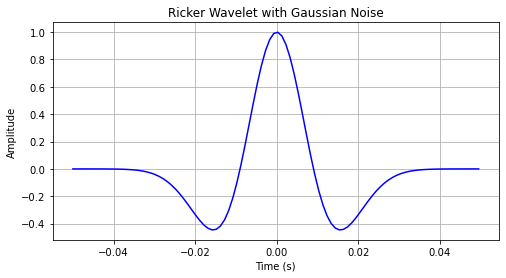

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ricker_wavelet(frequency, dt, length):
    t = np.linspace(-length/2, (length-dt)/2, int(length/dt))
    y = (1.0 - 2.0*(np.pi**2)*(frequency**2)*(t**2)) * np.exp(-(np.pi**2)*(frequency**2)*(t**2))
    return t, y


frequency = 25 
dt = 0.001
length = 0.1  
t, y = ricker_wavelet(frequency, dt, length)

r= (np.random.normal(0, 1, len(y)))**10
r=r/max(r)
plt.figure(figsize=(8, 4))
plt.plot(t, y, color='blue')
plt.title('Ricker Wavelet with Gaussian Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

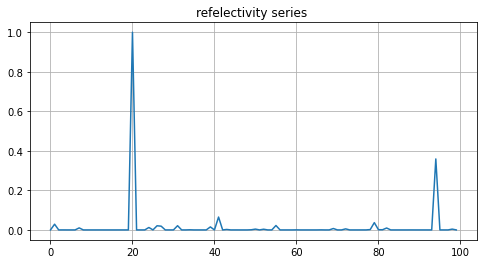

In [2]:
plt.figure(figsize=(8, 4))
plt.plot(r)
plt.title('refelectivity series ')
plt.grid(True)
plt.show()

# data without noise 

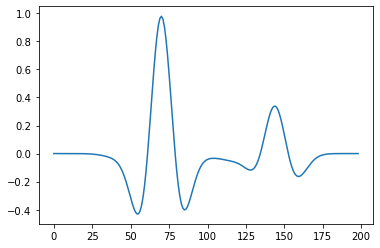

In [3]:
d=np.convolve(y,r)
plt.plot(d)

# data with noise 

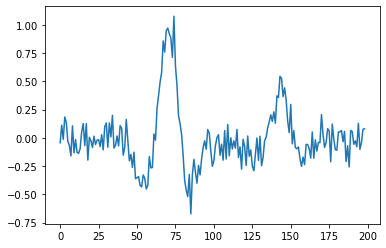

In [4]:
noise_std = 0.1
noise = np.random.normal(loc=0, scale=noise_std, size=d.shape)
dnew = d+ noise
d_new=dnew
# print("Original Data:", d)
# print("Noisy Data:", dnew)
plt.plot(dnew)


In [5]:
# np.shape(noise)
# # np.shape(xo)
# # print(p,q)
# # print(noise)

In [6]:

p=len(d)
q=len(y)
xo=np.hstack((np.zeros(p-q+1)))
xo=xo.reshape(len(xo),1)
col=np.hstack((y,np.zeros(p-q)))
row=np.hstack((y[0],np.zeros(p-q)))
from scipy.linalg import toeplitz
a=toeplitz(col,row)
A=np.dot(a.T,a)
np.shape(A)

(100, 100)

In [7]:
d=d.reshape(len(d),1)
d=np.dot(a.T,d)
np.shape(d)
dnew=dnew.reshape(len(dnew),1)
dnew=np.dot(a.T,dnew)
d_new=dnew
np.shape(dnew)


(100, 1)

# solution of without noise data

In [8]:
def decon(a,b,xo):
    x1=[]
    x2=[]
    mat_norm=[]
    i=0
    while True: 
        mat_norm.append(np.linalg.norm(b-np.dot(a,xo)))
#         x1.append(xo[0])
#         x2.append(xo[1])
        r=(b-np.dot(a,xo))
        beta=np.dot(r.T,r)/np.dot(r.T,np.dot(a,r))
        y=xo
        xo=xo+beta*r
        xnew=xo
        i=i
        if np.linalg.norm(xnew-y)<0.0001:
            break
        else:
            i=i+1
          
#     p1=plt.plot(x2,x1 );
    plt.figure(1);
    plt.title('convergence curve ')
    p2=plt.plot(mat_norm );
    plt.figure(2)
    plt.title('solution without noise  ')
    p3=plt.plot(xo) 
    return(p2,p3,i)

([<matplotlib.lines.Line2D at 0x788e7cdf8190>],
 682)

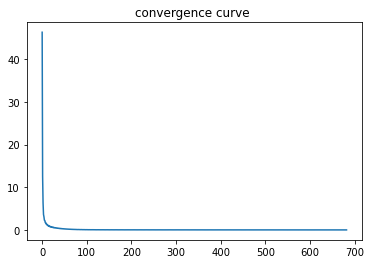

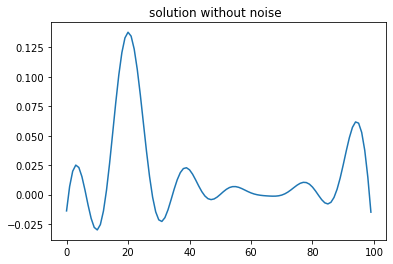

In [9]:
decon(A,d,xo)

# solution of noisy data by gradient descent

([<matplotlib.lines.Line2D at 0x788e7ceb15d0>],
 3110)

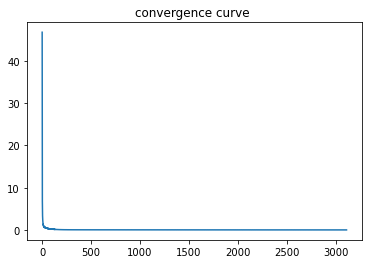

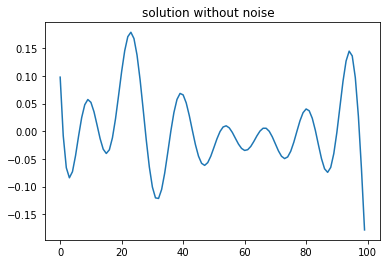

In [10]:
decon(A,dnew,xo)

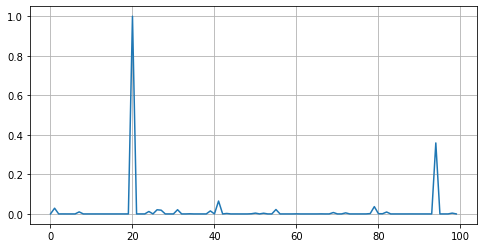

In [11]:
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.plot(r)

#  same problem by conjucate gradient

In [12]:
import numpy as np

def conjugate_gradient(A, b, xo, tol=0.000001):
    x = xo
    r = b - np.dot(A, x)
    d = r
    rs_old = np.dot(r.T, r)
    i=1
    mat_norm=[]
    while True:
        mat_norm.append(np.linalg.norm(b-np.dot(A,x)))
        Ad = np.dot(A, d)
        beta = rs_old / np.dot(d.T, Ad)
        x = x + beta * d
        r = r - beta * Ad
        rs_new = np.dot(r.T, r)
        if np.sqrt(rs_new) < tol:
            break
        d = r + (rs_new / rs_old) * d
        rs_old = rs_new
        i=i+1
    plt.figure(1);
    p2=plt.plot(mat_norm );
    plt.figure(2)
    p3=plt.plot(x) 
    return(p2,p3,i)



([<matplotlib.lines.Line2D at 0x788e7cbe4100>],
 69)

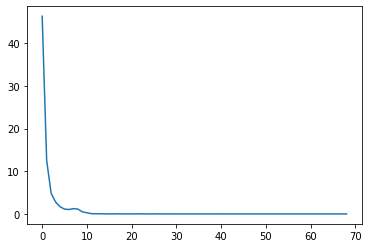

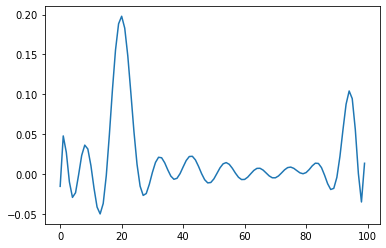

In [13]:
conjugate_gradient(A, d, xo, tol=0.000001)

# solution of noisy data by conjugate gradient

([<matplotlib.lines.Line2D at 0x788e7cca22f0>],
 2050)

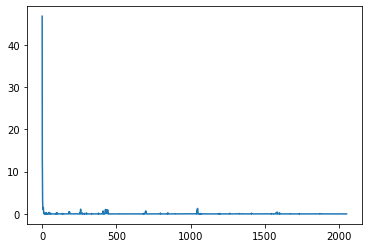

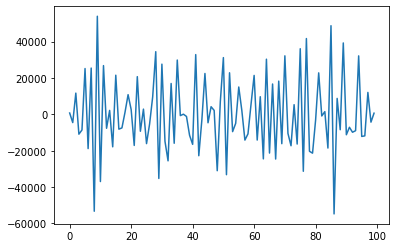

In [14]:
conjugate_gradient(A, d_new, xo, tol=0.000001)